<a href="https://colab.research.google.com/github/AnovaYoung/HeartDisease_Prediction/blob/Final-Project-Branch-(Main)/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [ ]:
file_path = r'C:\Users\manov\Downloads\archive(2)\Heart_Disease_Prediction.csv'
df = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(df.head())

print("\nBasic information about the dataset:")
print(df.info())

print("\nSummary statistics of the dataset:")
print(df.describe())

First few rows of the dataset:
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence 

**Total Entries**: 270

**Number of Columns**: 14

**Data Types:**
12 columns are of type int64 (integers).

1 column is of type float64 (floating-point numbers).

1 column is of type object (likely containing categorical data).

**No Missing Values**: Every column has 270 non-null entries, indicating there are no missing values in the dataset.

**Summary Statistics**
The summary statistics provide insights into the distribution and central tendencies of the numerical features:

**Age**: Ranges from 29 to 77 years, with a mean of 54.43 years.

**Sex**: Binary feature with 0 for females and 1 for males; mean of 0.68 suggests a higher number of males in the dataset.

**Chest Pain Type**: Categories ranging from 1 to 4; mean of 3.17.

**Blood Pressure** (BP): Ranges from 94 to 200 mm Hg, with a mean of 131.34 mm Hg.

**Cholesterol**: Ranges from 126 to 564 mg/dL, with a mean of 249.66 mg/dL.

Fasting Blood Sugar (FBS) over 120 **bold text**: Binary feature indicating whether FBS > 120 mg/dL; mean of 0.15.

**EKG Results**: Categorical feature with values ranging from 0 to 2; mean of 1.02.

**Max HR**: Maximum heart rate achieved, ranging from 71 to 202, with a mean of 149.68.

**Exercise Angina**: Binary feature indicating presence of exercise-induced angina; mean of 0.33.

**ST Depression**: Range from 0.0 to 6.2, with a mean of 1.05.

**Slope of ST**: Categorical feature with values ranging from 1 to 3; mean of 1.59.

**Number of Vessels Fluro**: Number of major vessels colored by fluoroscopy, ranging from 0 to 3, with a mean of 0.67.

**Thallium**: Categorical feature with values ranging from 3 to 7; mean of 4.70.

**Key Points:**

No Missing Data: The dataset is complete with no missing values.

Categorical Features: Several features are categorical and may need encoding.

Target Variable: The Heart Disease column is categorical with two classes, indicating a classification problem.

Potential Outliers: Some features like Cholesterol and ST Depression have wide ranges, indicating potential outliers.

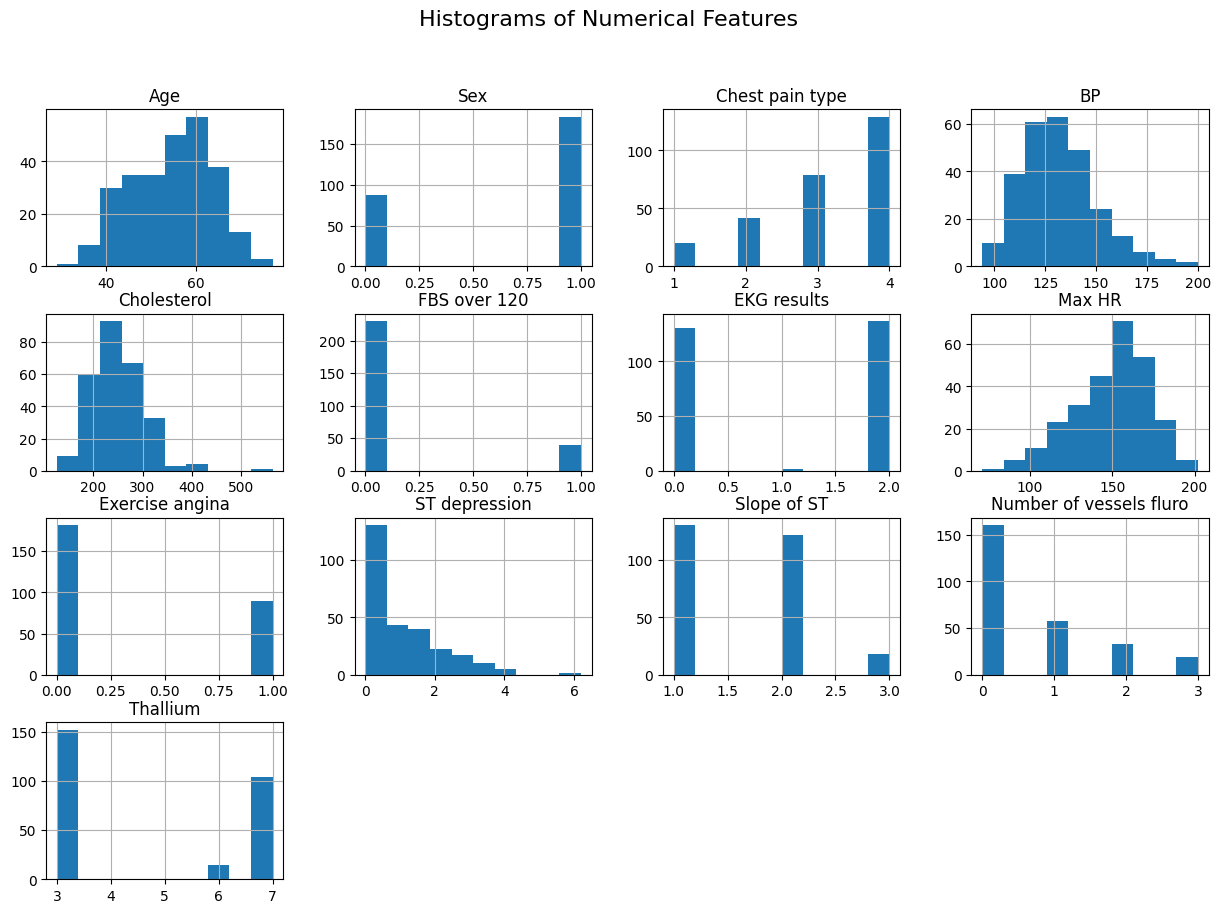

In [ ]:
# this is a histograms for all numerical columns
df.hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

Somewhat re-iterating above.

Quick analysis:

Age: The distribution is roughly normal, centered around the mean age of about 54 years.

Sex: The dataset has more males (1) than females (0).

Chest Pain Type: Most patients have chest pain type 3 or 4.

BP (Blood Pressure): The distribution is roughly normal, with most values between 120 and 150 mm Hg.

Cholesterol: The distribution is right-skewed, with a few high cholesterol values indicating potential outliers.

FBS over 120: Most patients have fasting blood sugar levels not over 120 mg/dL.

EKG Results: The dataset has a balanced distribution among the three EKG result categories.

Max HR (Maximum Heart Rate): The distribution is roughly normal, centered around 150 bpm.
Exercise Angina: Most patients do not experience exercise-induced angina.

ST Depression: The distribution is right-skewed, with most values between 0 and 2.

Slope of ST: The dataset has a balanced distribution among the three slope categories.

Number of Vessels Fluro: Most patients have 0 or 1 major vessels colored by fluoroscopy.

Thallium: The distribution shows three primary categories, with most values being 3, 6, or 7.

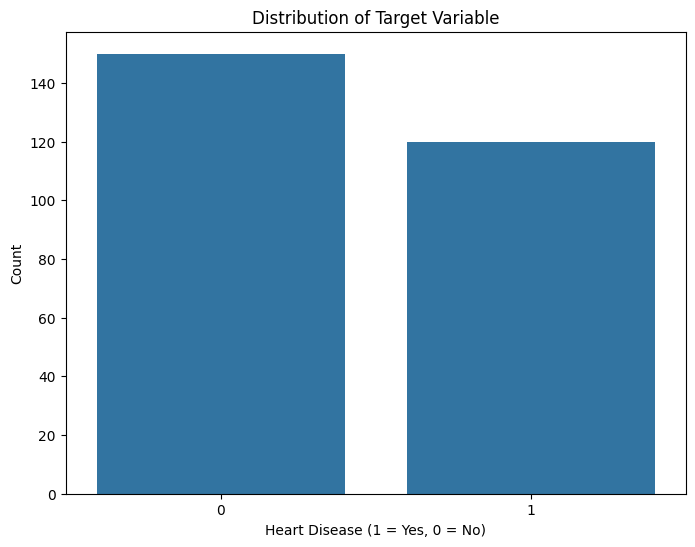

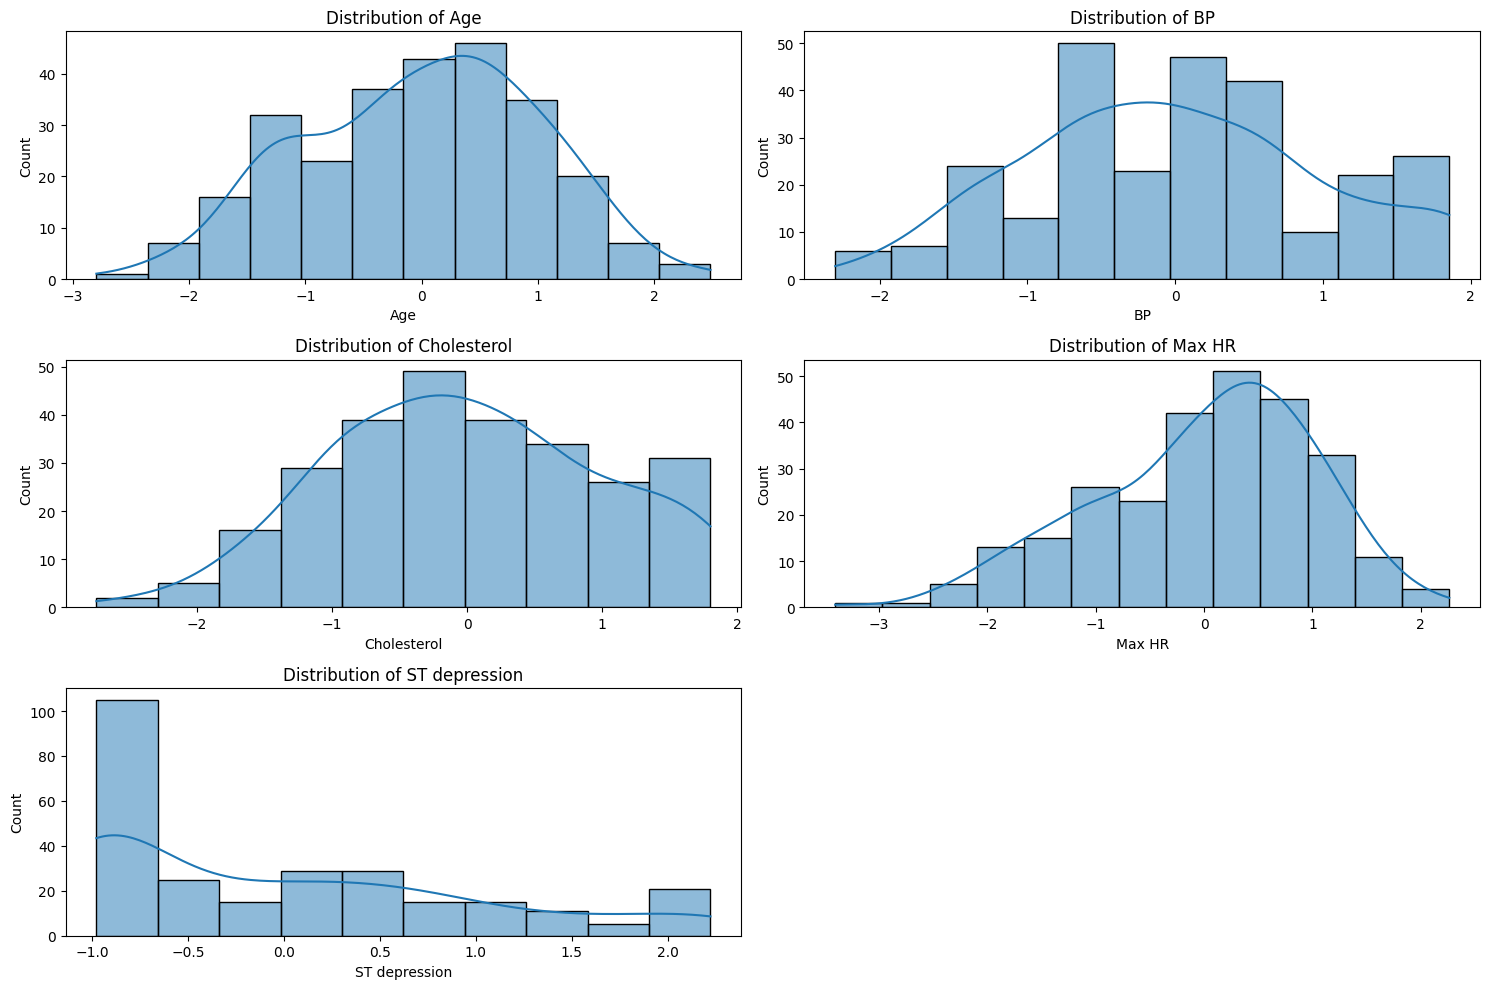

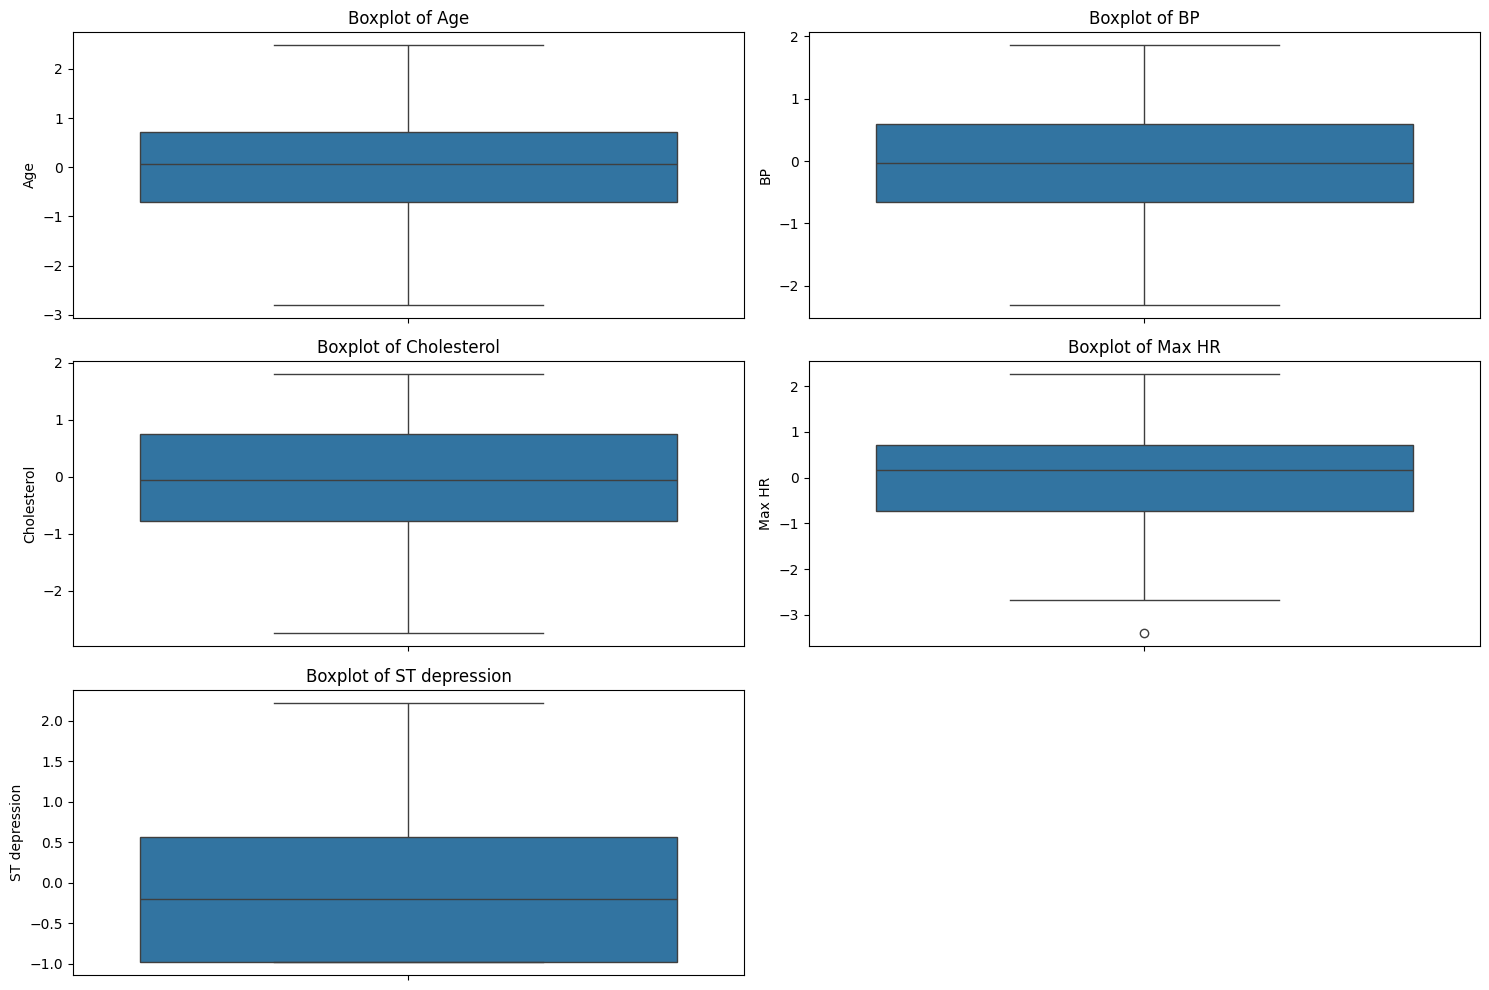

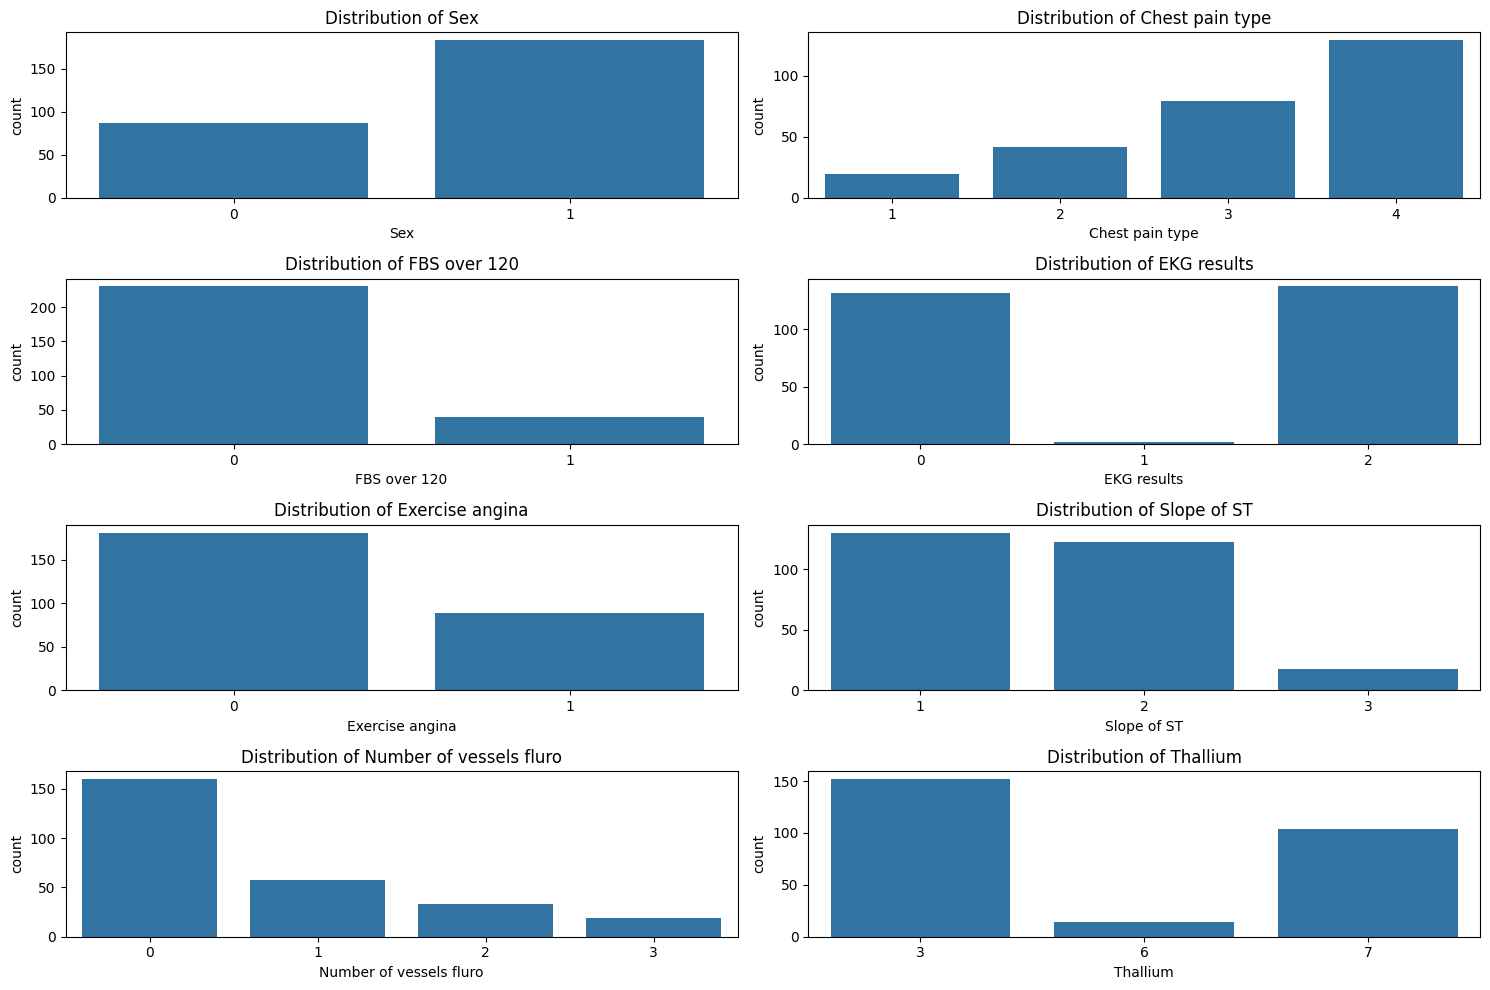

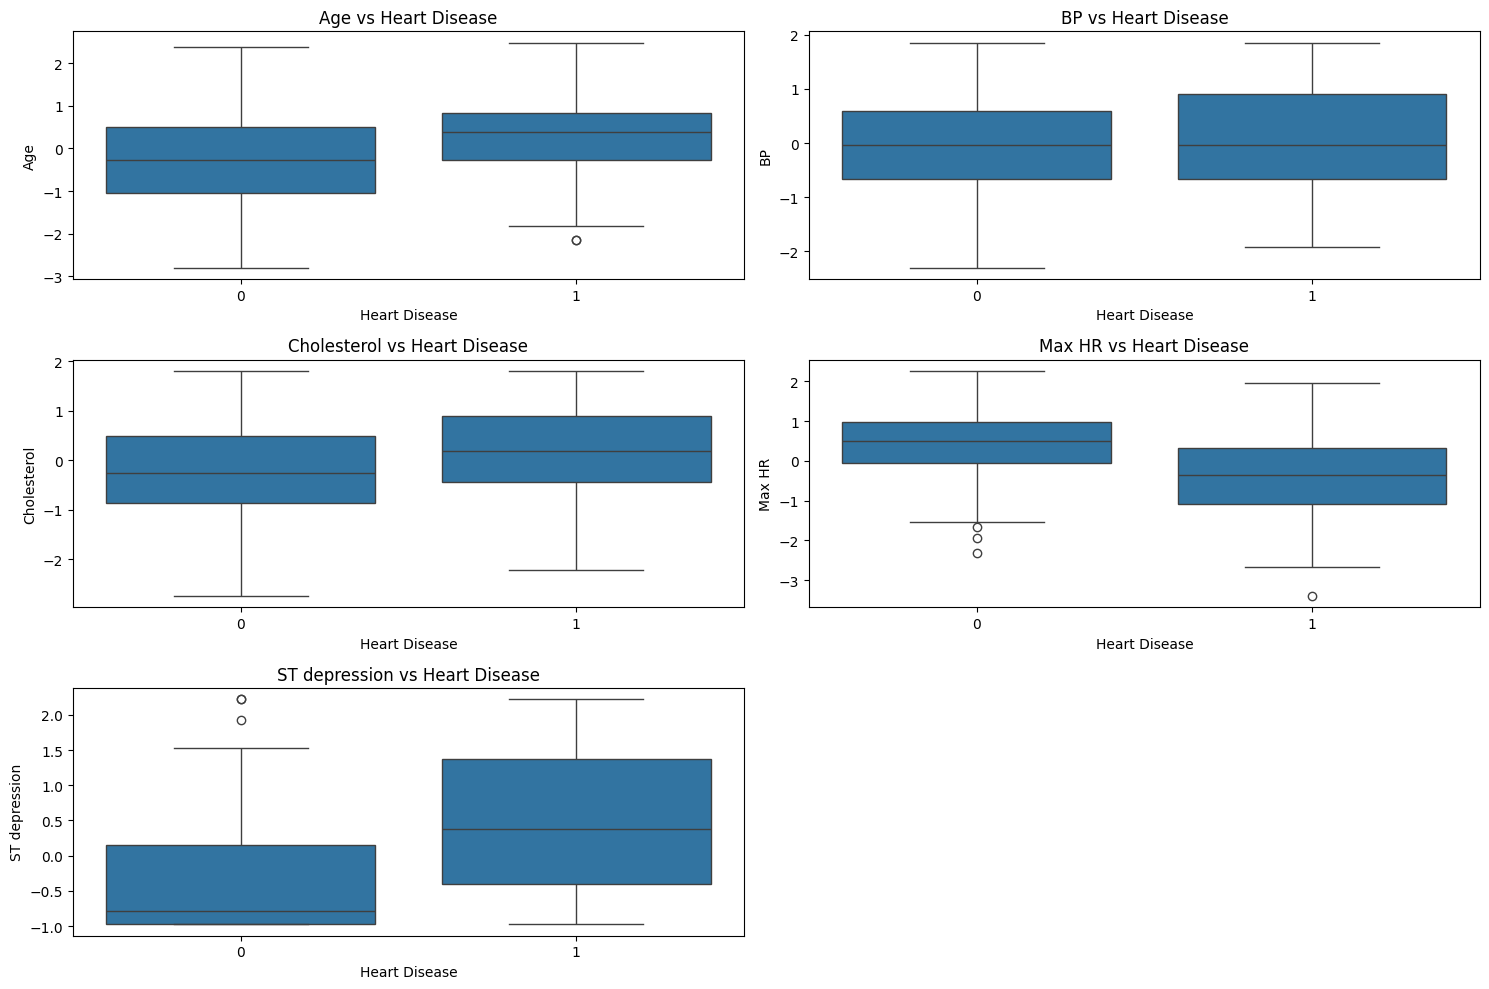

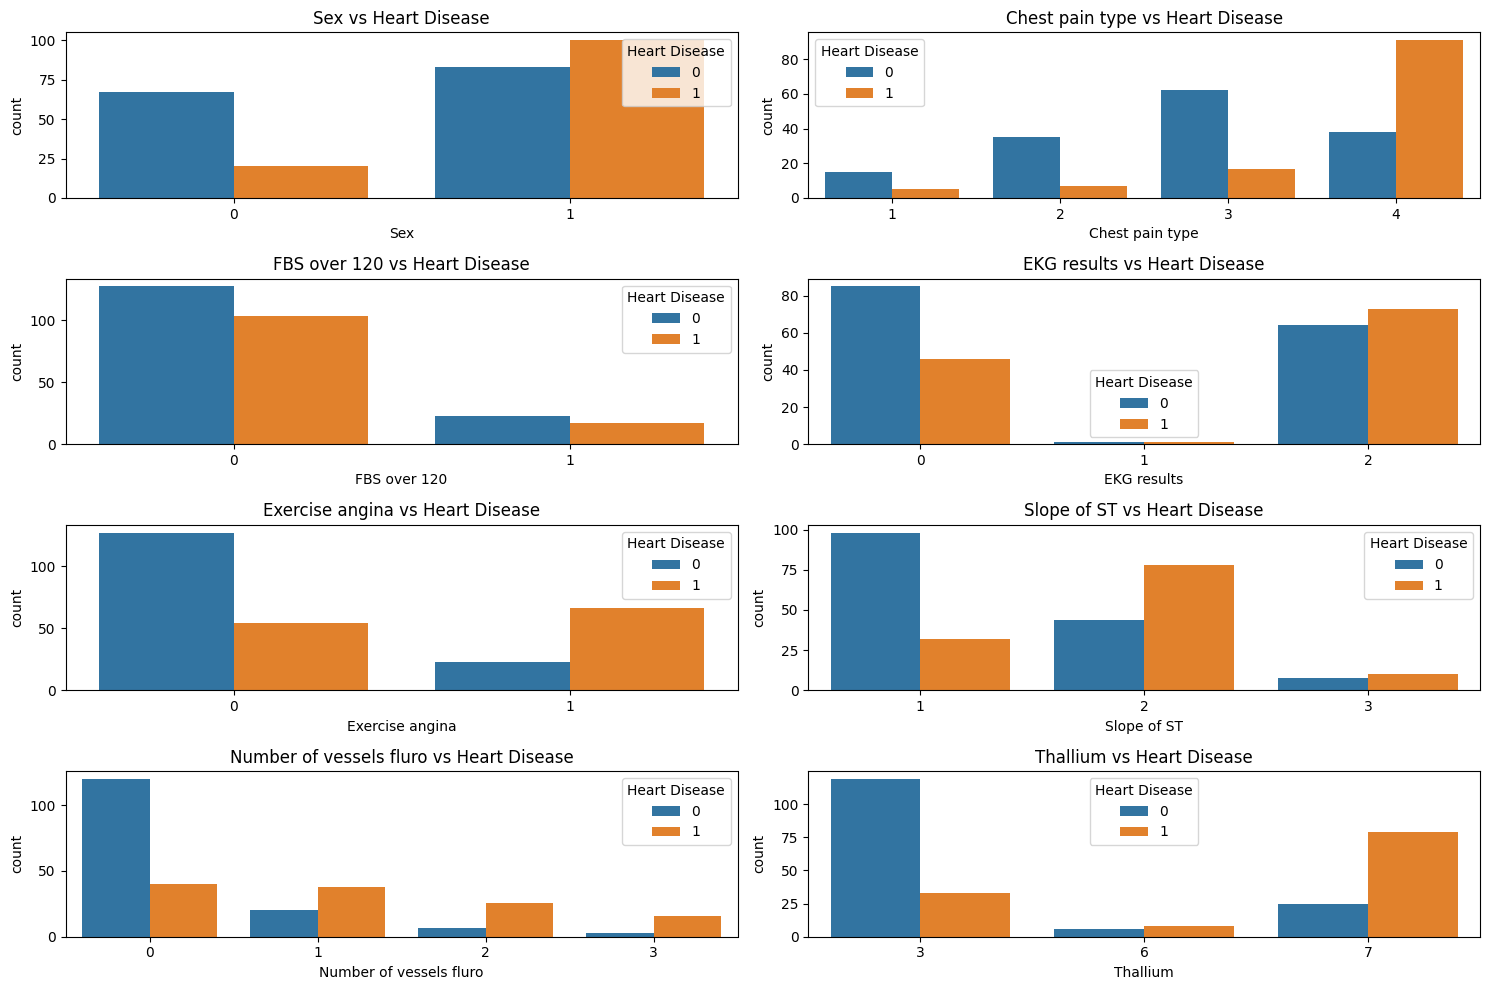

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Heart Disease', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Visualizing the distribution of numerical features
numerical_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Boxplots of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Visualizing the distribution of categorical features
categorical_features = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

plt.figure(figsize=(15, 10))  # Adjust the figure size if needed
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)  # Change to 4 rows by 2 columns layout
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Visualizing the relationships between numerical features and the target variable
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Heart Disease', y=feature, data=df)
    plt.title(f'{feature} vs Heart Disease')
plt.tight_layout()
plt.show()

# Visualizing the relationships between categorical features and the target variable
plt.figure(figsize=(15, 10))  # Adjust the figure size if needed
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)  # Change to 4 rows by 2 columns layout
    sns.countplot(x=feature, hue='Heart Disease', data=df)
    plt.title(f'{feature} vs Heart Disease')
plt.tight_layout()
plt.show()


Somewhat re-iterating above.

Quick analysis:

Age: The distribution is roughly normal, centered around the mean age of about 54 years.

Sex: The dataset has more males (1) than females (0).

Chest Pain Type: Most patients have chest pain type 3 or 4.

BP (Blood Pressure): The distribution is roughly normal, with most values between 120 and 150 mm Hg.

Cholesterol: The distribution is right-skewed, with a few high cholesterol values indicating potential outliers.

FBS over 120: Most patients have fasting blood sugar levels not over 120 mg/dL.

EKG Results: The dataset has a balanced distribution among the three EKG result categories.

Max HR (Maximum Heart Rate): The distribution is roughly normal, centered around 150 bpm.
Exercise Angina: Most patients do not experience exercise-induced angina.

ST Depression: The distribution is right-skewed, with most values between 0 and 2.

Slope of ST: The dataset has a balanced distribution among the three slope categories.

Number of Vessels Fluro: Most patients have 0 or 1 major vessels colored by fluoroscopy.

Thallium: The distribution shows three primary categories, with most values being 3, 6, or 7.

In [ ]:
# Now lets analyze and convert categorical features

df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# Display the first few rows to confirm the conversion
print("Updated dataset with numerical target variable:")
print(df.head())

Updated dataset with numerical target variable:
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0      

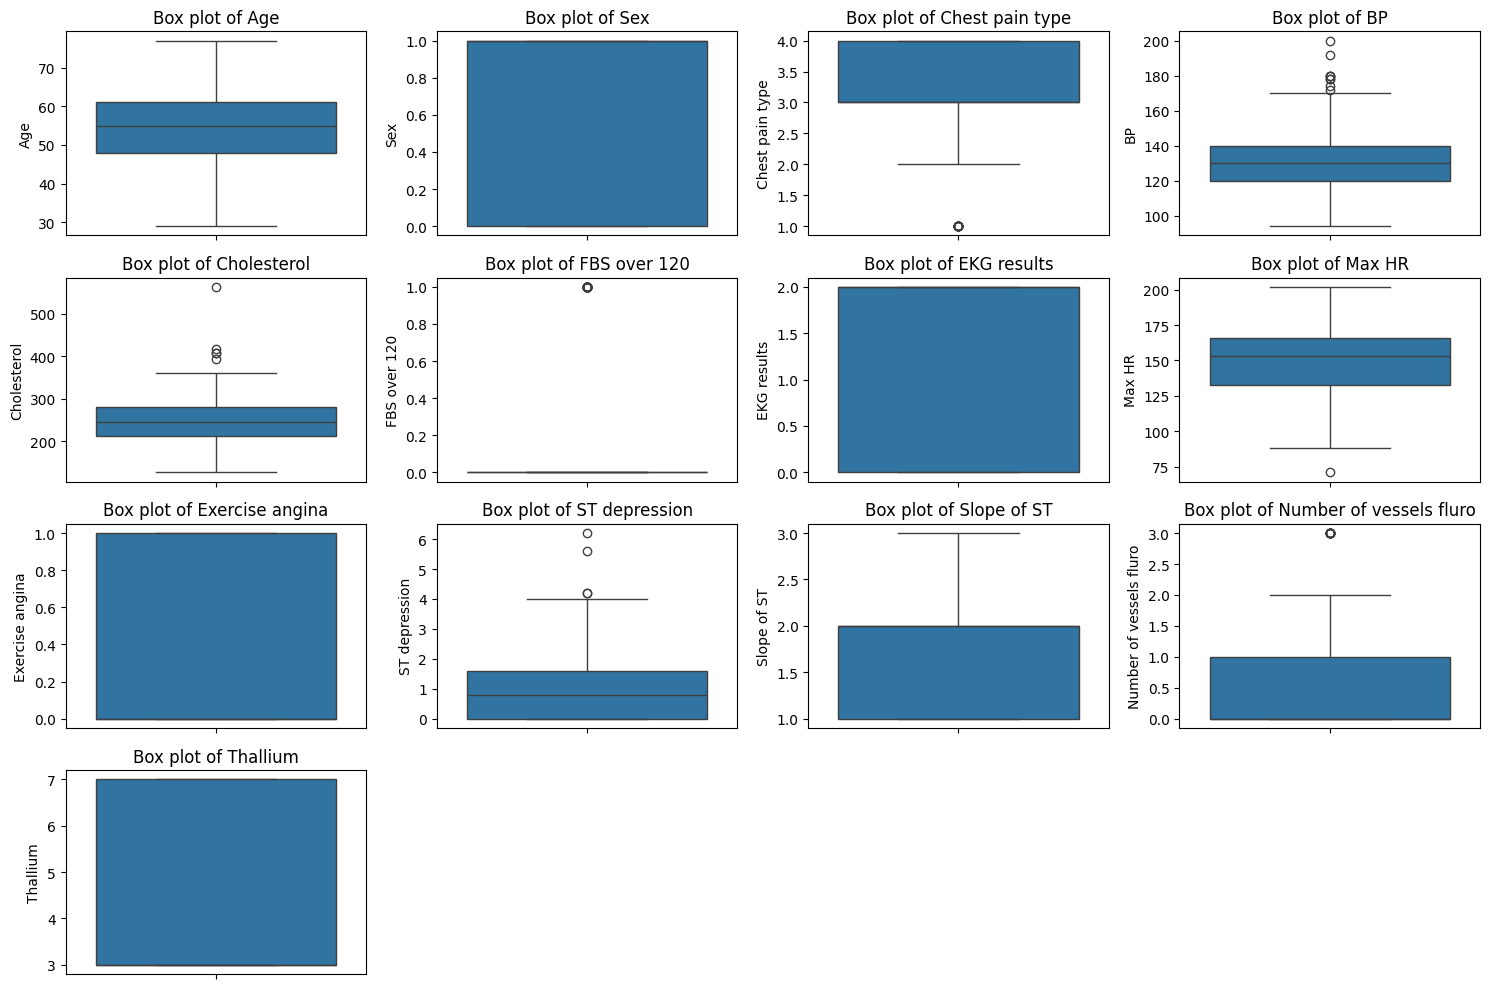

In [ ]:
import seaborn as sns

# We are going to perform correlation analysis to identify potential outliers in the data
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()


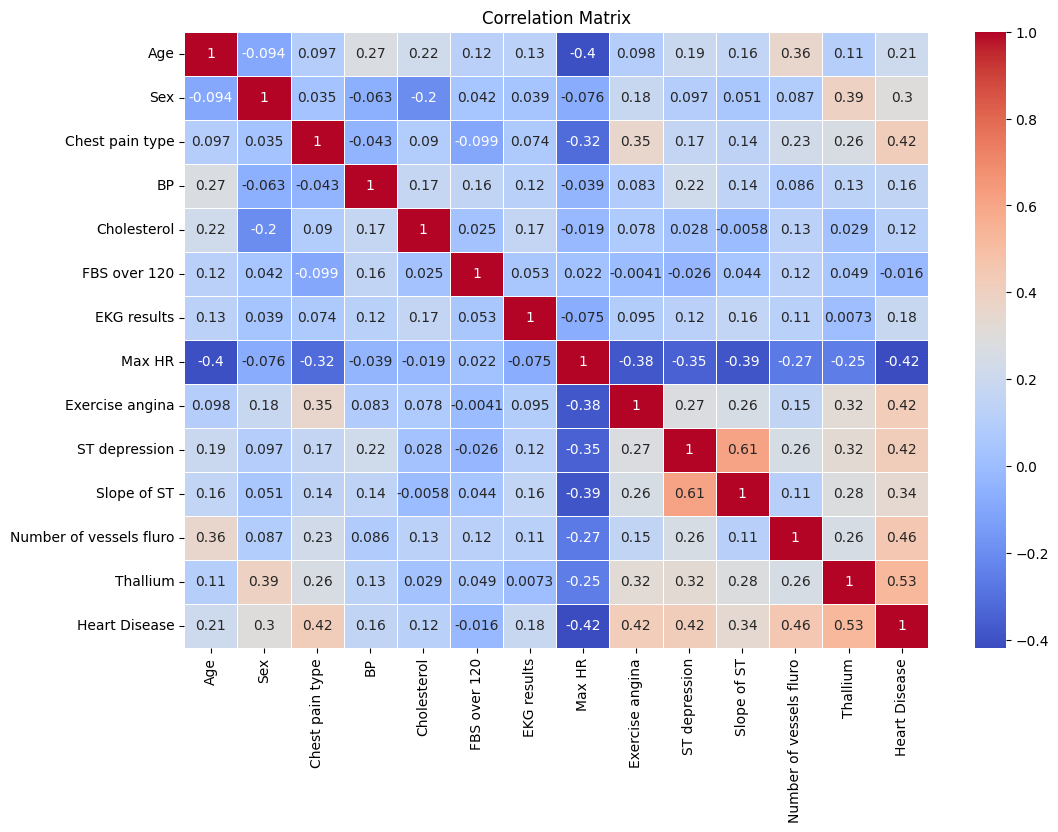

In [ ]:
# And now calculate the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**Lets Analyze Both Box-Plots and Correlation Matrix**

**BOX PLOTS**

Age: The age distribution appears fairly normal with no significant outliers.

Sex: Binary feature with no outliers, as expected.
Chest Pain Type: One minor outlier in chest pain type 1.

BP (Blood Pressure): Several outliers above 160 mm Hg, some patients have significantly high blood pressure.

Cholesterol: Noticeable outliers above 400 mg/dL, some patients also have very high cholesterol levels.

FBS over 120: One outlier with FBS over 120.

EKG Results: No significant outliers observed.

Max HR (Maximum Heart Rate): One outlier below 100 bpm.

Exercise Angina: Binary feature with no outliers.

ST Depression: A few outliers above 4, this means there is high levels of ST depression in some patients.

Slope of ST: No significant outliers observed.

Number of Vessels Fluro: One minor outlier with a value of 3.

Thallium: No significant outliers.

**CORRELATION MATRIX**

Strong Positive Correlation:

Thallium and Heart Disease (0.53): Higher thallium levels are associated with a higher likelihood of heart disease.

Number of vessels fluro and Heart Disease (0.46): More vessels colored by fluoroscopy indicate a higher risk of heart disease.

Chest pain type and Heart Disease (0.42): Certain types of chest pain are strongly associated with heart disease.

Exercise angina and Heart Disease (0.42): Presence of exercise-induced angina is strongly linked to heart disease.

Negative Correlation:

Max HR and Heart Disease (-0.42): Lower maximum heart rates are associated with a higher likelihood of heart disease.

Moderate Correlations:

Sex and Heart Disease (0.39): Males are more likely to have heart disease. (true or population bias?)

Slope of ST and Heart Disease (0.34): Certain slopes of the ST segment are associated with heart disease.

ST depression and Heart Disease (0.42): Higher ST depression values are linked to heart disease.

To handle outliers, the specific outliers in Cholesterol, BP, and ST Depression will be capped at the 95th percentile to mitigate their impact. It will with stability and performance in the model.

In [ ]:
# This is the function to cap outliers at the 95th percentile
def cap_outliers(df, columns):
    for col in columns:
        upper_limit = df[col].quantile(0.95)
        df[col] = df[col].apply(lambda x: upper_limit if x > upper_limit else x)
    return df

# List of the specific columns to cap outliers
columns_to_cap = ['Cholesterol', 'BP', 'ST depression']

# Capping outliers
df = cap_outliers(df, columns_to_cap)

# Display summary statistics after capping
print("Summary statistics after capping outliers:")
print(df.describe())


Summary statistics after capping outliers:
              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  130.533333   247.106296   
std      9.109067    0.468195         0.950090   15.905763    44.195526   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  160.000000   326.550000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000     270.000000   
mean       0.148148     1.022222  149.677778         0.329630       1.011630   
std        0.355906     0.997891   23.165

**FEATURE ENGINEERING!**

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to normalize
numerical_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows to confirm normalization
print("First few rows after normalization:")
print(df.head())


First few rows after normalization:
        Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0  1.712094    1                4 -0.033593     1.697746             0   
1  1.382140    0                3 -0.978399     1.800889             0   
2  0.282294    1                2 -0.411515     0.314953             0   
3  1.052186    1                4 -0.159567     0.360290             0   
4  2.152032    0                2 -0.663464     0.496303             0   

   EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
0            2 -1.759208                0       1.342400            2   
1            2  0.446409                0       0.568889            2   
2            0 -0.375291                0      -0.688067            1   
3            0 -1.932198                1      -0.784756            2   
4            2 -1.240239                1      -0.784756            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3

**TRAIN-TEST-VALIDATION SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split features from target variable
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [ ]:
#  Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions with the Random Forest model
y_val_pred_rf = rf_model.predict(X_val)

# Evaluate the Random Forest model on the validation set
print("Random Forest Model Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_val_pred_rf))


Random Forest Model Evaluation on Validation Set:
Accuracy: 0.7037037037037037
Confusion Matrix:
 [[25  4]
 [12 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.86      0.76        29
           1       0.76      0.52      0.62        25

    accuracy                           0.70        54
   macro avg       0.72      0.69      0.69        54
weighted avg       0.72      0.70      0.69        54



In [ ]:
# Initializing and training the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_val_pred_xgb = xgb_model.predict(X_val)

# Evaluate the XGBoost model on val set
print("XGBoost Model Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_xgb))
print("Classification Report:\n", classification_report(y_val, y_val_pred_xgb))


XGBoost Model Evaluation on Validation Set:
Accuracy: 0.7222222222222222
Confusion Matrix:
 [[26  3]
 [12 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.90      0.78        29
           1       0.81      0.52      0.63        25

    accuracy                           0.72        54
   macro avg       0.75      0.71      0.71        54
weighted avg       0.74      0.72      0.71        54



In [ ]:
# Now we are gpoing to choose the best model and evaluate it on the test set
best_model = rf_model if accuracy_score(y_val, y_val_pred_rf) > accuracy_score(y_val, y_val_pred_xgb) else xgb_model
y_test_pred = best_model.predict(X_test)

print("Best Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Best Model Evaluation on Test Set:
Accuracy: 0.8148148148148148
Confusion Matrix:
 [[32  2]
 [ 8 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86        34
           1       0.86      0.60      0.71        20

    accuracy                           0.81        54
   macro avg       0.83      0.77      0.79        54
weighted avg       0.82      0.81      0.81        54



In [ ]:
# Same evaluation this time on the validation set
y_val_pred_best = best_model.predict(X_val)

print("Best Model Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_best))
print("Classification Report:\n", classification_report(y_val, y_val_pred_best))


Best Model Evaluation on Validation Set:
Accuracy: 0.7222222222222222
Confusion Matrix:
 [[26  3]
 [12 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.90      0.78        29
           1       0.81      0.52      0.63        25

    accuracy                           0.72        54
   macro avg       0.75      0.71      0.71        54
weighted avg       0.74      0.72      0.71        54



**Interpretation**

Class 0 (No Heart Disease):

Precision: 0.68

Recall: 0.90

F1-Score: 0.78

Support: 29

This is indicative of a model that's better at identifying patients without heart disease (class 0). It correctly identified 90% of the actual class 0 patients but has a moderate precision, as in, some patients without heart disease were incorrectly classified.

Class 1 (Heart Disease):

Precision: 0.81

Recall: 0.52

F1-Score: 0.63

Support: 25

The model has a higher precision for identifying patients with heart disease (class 1), but a lower recall. This means that while the model is more accurate in its positive predictions, it missed a significant number of actual heart disease cases (48%).

**Overall Performance:**

Accuracy: 72.22%

Macro Average F1-Score: 0.71

Weighted Average F1-Score: 0.71

**HYPERPARAMETER TUNING FOR RANDOM FOREST**

In [ ]:
#We are going to start by using GridSearchCV to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Display the best hyperparameters
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best parameters for Random Forest:", best_params_rf)
print("Best cross-validation accuracy for Random Forest:", best_score_rf)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.8642045454545455


In [ ]:
from xgboost import XGBClassifier

# Everything below is the same as above: this time for XGBoost model

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

xgb_model = XGBClassifier(random_state=42)

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search_xgb.fit(X_train, y_train)

best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("Best parameters for XGBoost:", best_params_xgb)
print("Best cross-validation accuracy for XGBoost:", best_score_xgb)


Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best cross-validation accuracy for XGBoost: 0.8579545454545455


**TRYING TO ENHANCE THE MODELS**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Defining parameter grid for Random Forest with more options
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'bootstrap': [True, False]
}

# Randomized Search with cross-val
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
        param_distributions=param_grid_rf,
        n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')

random_search_rf.fit(X_train, y_train)

# Best params and score
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

print("Enhanced Random Forest Best Parameters:", best_params_rf)
print("Enhanced Random Forest Best Cross-Validation Accuracy:", best_score_rf)

# Train the model with the best params
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_model.fit(X_train, y_train)

y_val_pred_rf = best_rf_model.predict(X_val)
print("Enhanced Random Forest Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_val_pred_rf))

y_test_pred_rf = best_rf_model.predict(X_test)
print("Enhanced Random Forest Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_test_pred_rf))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Enhanced Random Forest Best Parameters: {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_depth': 40, 'bootstrap': True}
Enhanced Random Forest Best Cross-Validation Accuracy: 0.8704545454545455
Enhanced Random Forest Evaluation on Validation Set:
Accuracy: 0.7037037037037037
Confusion Matrix:
 [[26  3]
 [13 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.90      0.76        29
           1       0.80      0.48      0.60        25

    accuracy                           0.70        54
   macro avg       0.73      0.69      0.68        54
weighted avg       0.73      0.70      0.69        54

Enhanced Random Forest Evaluation on Test Set:
Accuracy: 0.7777777777777778
Confusion Matrix:
 [[31  3]
 [ 9 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        34

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Everything the same as above: this time for XGBoost model

param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

random_search_xgb = RandomizedSearchCV(estimator=XGBClassifier(random_state=42),
        param_distributions=param_grid_xgb,
        n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')

random_search_xgb.fit(X_train, y_train)

best_params_xgb = random_search_xgb.best_params_
best_score_xgb = random_search_xgb.best_score_

print("Enhanced XGBoost Best Parameters:", best_params_xgb)
print("Enhanced XGBoost Best Cross-Validation Accuracy:", best_score_xgb)

best_xgb_model = XGBClassifier(**best_params_xgb, random_state=42)
best_xgb_model.fit(X_train, y_train)

y_val_pred_xgb = best_xgb_model.predict(X_val)
print("Enhanced XGBoost Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_xgb))
print("Classification Report:\n", classification_report(y_val, y_val_pred_xgb))

y_test_pred_xgb = best_xgb_model.predict(X_test)
print("Enhanced XGBoost Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_test_pred_xgb))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Enhanced XGBoost Best Parameters: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.6}
Enhanced XGBoost Best Cross-Validation Accuracy: 0.8579545454545455
Enhanced XGBoost Evaluation on Validation Set:
Accuracy: 0.7037037037037037
Confusion Matrix:
 [[25  4]
 [12 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.86      0.76        29
           1       0.76      0.52      0.62        25

    accuracy                           0.70        54
   macro avg       0.72      0.69      0.69        54
weighted avg       0.72      0.70      0.69        54

Enhanced XGBoost Evaluation on Test Set:
Accuracy: 0.8518518518518519
Confusion Matrix:
 [[32  2]
 [ 6 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           

**Lets Analyze The Models' Results**

Validation Set Performance:

Both models achieved similar accuracy on the validation set (~70.37%).

XGBoost has slightly better precision and recall for class 1 (Heart Disease) compared to Random Forest.

Test Set Performance:

XGBoost outperforms Random Forest with an accuracy of 85.19% compared to 77.78%.

XGBoost has higher precision, recall, and F1-score for both classes on the test set.

Conclusion

Based on the evaluation on the validation and test sets, the XGBoost model shows better overall performance and generalization compared to the Random Forest model.

In [ ]:
# I need to check the distribution of men versus women
gender_distribution = df['Sex'].value_counts()
print("Gender Distribution (0 = Female, 1 = Male):")
print(gender_distribution)


Gender Distribution (0 = Female, 1 = Male):
Sex
1    183
0     87
Name: count, dtype: int64


That is a massive difference, we will apply sampling techniques in our next model build to address this.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Training (60%), validation (20%), and test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [ ]:
# Train the Random Forest model with the best hyperparameters
best_rf_model_smote = RandomForestClassifier(
    bootstrap=True,
    max_depth=40,
    min_samples_leaf=8,
    min_samples_split=20,
    n_estimators=200,
    random_state=42
)
best_rf_model_smote.fit(X_train_smote, y_train_smote)

y_val_pred_rf_smote = best_rf_model_smote.predict(X_val)
print("SMOTE Random Forest Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_rf_smote))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_rf_smote))
print("Classification Report:\n", classification_report(y_val, y_val_pred_rf_smote))

SMOTE Random Forest Evaluation on Validation Set:
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[23  6]
 [12 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.79      0.72        29
           1       0.68      0.52      0.59        25

    accuracy                           0.67        54
   macro avg       0.67      0.66      0.65        54
weighted avg       0.67      0.67      0.66        54



In [ ]:
# XGBoost model
best_xgb_model_smote = XGBClassifier(
    colsample_bytree=0.6,
    learning_rate=0.01,
    max_depth=3,
    n_estimators=200,
    subsample=0.6,
    gamma=0.3,
    random_state=42
)
best_xgb_model_smote.fit(X_train_smote, y_train_smote)

# Evaluate on the validation set
y_val_pred_xgb_smote = best_xgb_model_smote.predict(X_val)
print("SMOTE XGBoost Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_xgb_smote))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_xgb_smote))
print("Classification Report:\n", classification_report(y_val, y_val_pred_xgb_smote))


SMOTE XGBoost Evaluation on Validation Set:
Accuracy: 0.7037037037037037
Confusion Matrix:
 [[25  4]
 [12 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.86      0.76        29
           1       0.76      0.52      0.62        25

    accuracy                           0.70        54
   macro avg       0.72      0.69      0.69        54
weighted avg       0.72      0.70      0.69        54



Since SMOTE did not significantly improve the performance of the Random Forest model and the XGBoost model performed relatively better, I will proceed with ensemble learning.

Ensemble methods combine the predictions of multiple models to improve overall performance. One common approach is to use a "simple averaging of probabilities" or a "weighted averaging" if the models have different performance levels.

I will start with the simple averaging method.


**ENSEMBLE LEARNING**

In [ ]:
import numpy as np

# This will get the prediction probabilities from both models
rf_probs = best_rf_model_smote.predict_proba(X_val)[:, 1]
xgb_probs = best_xgb_model_smote.predict_proba(X_val)[:, 1]

# Averaging the probabilities
ensemble_probs = (rf_probs + xgb_probs) / 2
ensemble_preds = np.where(ensemble_probs > 0.5, 1, 0)

print("Ensemble Model Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, ensemble_preds))
print("Confusion Matrix:\n", confusion_matrix(y_val, ensemble_preds))
print("Classification Report:\n", classification_report(y_val, ensemble_preds))

Ensemble Model Evaluation on Validation Set:
Accuracy: 0.6851851851851852
Confusion Matrix:
 [[24  5]
 [12 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74        29
           1       0.72      0.52      0.60        25

    accuracy                           0.69        54
   macro avg       0.69      0.67      0.67        54
weighted avg       0.69      0.69      0.68        54



Still not happy with these results.

I'm going to attempt "Stacking", (an advanced ensemble technique).

Stacking involves training a meta-model to combine the predictions of base models. I'll use Logistic Regression as my meta-model and i'm going to be using sklearn's StackingClassifier to implement it.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the base models
estimators = [
    ('rf', RandomForestClassifier(
        bootstrap=True,
        max_depth=40,
        min_samples_leaf=8,
        min_samples_split=20,
        n_estimators=200,
        random_state=42
    )),
    ('xgb', XGBClassifier(
        colsample_bytree=0.6,
        learning_rate=0.01,
        max_depth=3,
        n_estimators=200,
        subsample=0.6,
        gamma=0.3,
        random_state=42
    ))
]

# Define the stacking model with Logistic Regression as the meta-model
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Train the stacking model
stacking_model.fit(X_train_smote, y_train_smote)

y_test_pred_stacking = stacking_model.predict(X_test)
print("Stacking Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_stacking))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_stacking))
print("Classification Report:\n", classification_report(y_test, y_test_pred_stacking))


Stacking Model Evaluation on Test Set:
Accuracy: 0.8518518518518519
Confusion Matrix:
 [[31  3]
 [ 5 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89        34
           1       0.83      0.75      0.79        20

    accuracy                           0.85        54
   macro avg       0.85      0.83      0.84        54
weighted avg       0.85      0.85      0.85        54



In [ ]:
# Evaluate the stacking model on the validation set
y_val_pred_stacking = stacking_model.predict(X_val)
print("Stacking Model Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_stacking))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_stacking))
print("Classification Report:\n", classification_report(y_val, y_val_pred_stacking))


Stacking Model Evaluation on Validation Set:
Accuracy: 0.6851851851851852
Confusion Matrix:
 [[24  5]
 [12 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74        29
           1       0.72      0.52      0.60        25

    accuracy                           0.69        54
   macro avg       0.69      0.67      0.67        54
weighted avg       0.69      0.69      0.68        54



Validation Set Performance:

The validation set performance is pretty bad, the model is not generalizing well at all to unseen data. The accuracy is 0.6852, with a recall for class 1 (Heart Disease) at 0.52.

Test Set Performance:

The test set performance is good, with an accuracy of 0.8519. The recall for class 1 is 0.75, and precision is 0.83.

Conclusion
The stacking model shows a significant discrepancy between the validation and test set performances. The model performs really well on the test set, but its not reliable on truly unseen data. The meta-model did not significantly improve the validation performance.

**Lets try 2 feature engineering tactics with a different Meta-Model**

**Step 1: Cross-Validation**

We'll start by implementing cross-validation to ensure the model's robustness. This involves evaluating the model multiple times on different subsets of the data.

**Step 2: Feature Engineering**

Two feature engineering tactics:

Polynomial Features: Creating interaction terms and polynomial features.

Scaling Features: Standardizing the features to have a mean of 0 and a standard deviation of 1.

**Step 3: Neural Network Meta-Model**

We'll use a neural network as the meta-model for stacking.

Lets start from the very beginning


**FEATURE ENGINEERING**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Split the dataset into features and target variable
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Define the preprocessing pipeline
numerical_features = X.columns
numerical_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ]
)



**SPLITTING DATA AND APPLYING SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train_smote_preprocessed = preprocessor.fit_transform(X_train_smote)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)


**TRAINING BASE MODELS**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Random Forest
best_rf_model_smote = RandomForestClassifier(
    bootstrap=True,
    max_depth=40,
    min_samples_leaf=8,
    min_samples_split=20,
    n_estimators=200,
    random_state=42
)
best_rf_model_smote.fit(X_train_smote_preprocessed, y_train_smote)

# XGBoost
best_xgb_model_smote = XGBClassifier(
    colsample_bytree=0.6,
    learning_rate=0.01,
    max_depth=3,
    n_estimators=200,
    subsample=0.6,
    gamma=0.3,
    random_state=42
)
best_xgb_model_smote.fit(X_train_smote_preprocessed, y_train_smote)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

**CROSS-VALIDATION**

In [ ]:
from sklearn.model_selection import cross_val_score

# Performing cross-val on the base models
rf_scores = cross_val_score(best_rf_model_smote, X_train_smote_preprocessed, y_train_smote, cv=5, scoring='accuracy')
xgb_scores = cross_val_score(best_xgb_model_smote, X_train_smote_preprocessed, y_train_smote, cv=5, scoring='accuracy')

print(f'Random Forest Cross-Validation Accuracy: {rf_scores.mean()}')
print(f'XGBoost Cross-Validation Accuracy: {xgb_scores.mean()}')


Random Forest Cross-Validation Accuracy: 0.8507563025210084
XGBoost Cross-Validation Accuracy: 0.86218487394958


STACKING WITH A NEURAL NETWORK META-MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# neural network architecture
def create_nn(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# This will convert the neural network to a scikit-learn compatible classifier and I'm
# using a lambda function to create the model with the correct input dimensions since that was an issue I was having.
# It expected 104 and got 2 because of the two base models.
nn_model = KerasClassifier(model=lambda: create_nn(input_dim=2), epochs=50, batch_size=32, verbose=0)

# Stacking model architecture
stacking_model = StackingClassifier(
    estimators=[
        ('rf', best_rf_model_smote),
        ('xgb', best_xgb_model_smote)
    ],
    final_estimator=nn_model,
    cv=5
)

# Training the stacking model
stacking_model.fit(X_train_smote_preprocessed, y_train_smote)

# Evaluate on the test set
y_test_pred_stacking = stacking_model.predict(X_test_preprocessed)
print("Stacking Model with NN Meta-Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_stacking))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_stacking))
print("Classification Report:\n", classification_report(y_test, y_test_pred_stacking))

#  validation set
y_val_pred_stacking = stacking_model.predict(X_val_preprocessed)
print("Stacking Model with NN Meta-Model Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_stacking))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_stacking))
print("Classification Report:\n", classification_report(y_val, y_val_pred_stacking))


C:\Users\manov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Stacking Model with NN Meta-Model Evaluation on Test Set:
Accuracy: 0.9074074074074074
Confusion Matrix:
 [[33  1]
 [ 4 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        34
           1       0.94      0.80      0.86        20

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54

Stacking Model with NN Meta-Model Evaluation on Validation Set:
Accuracy: 0.6851851851851852
Confusion Matrix:
 [[24  5]
 [12 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74        29
           1       0.72      0.52      0.60        25

    accuracy                           0.69        54
   macro avg       0.69      0.67      0.67        54
weighted avg       0.69      0.69      0.68        54




### Interpretation

1. **Test Set Performance**:
 - The model performs exceptionally well on the test set, with an accuracy of 90.74%.
 - Both precision and recall are high. So, the model can correctly classify both positive and negative cases with high accuracy.

2. **Validation Set Performance**:
 - The model's performance on the validation set is significantly lower, with an accuracy of 68.52%.
 - There is a noticeable drop in recall for class 1 (Heart Disease), indicating that the model is missing many true positive cases.

We need to fix this.

### Next Steps

Given the discrepancy between the test and validation set performance, I'm going to focus on improving the model's generalization to unseen data. Here are a few strategies I'll try:

1. **Cross-Validation**:
 - Use k-fold cross-validation to get a more robust estimate of the model's performance on unseen data.

2. **Hyperparameter Tuning**:
 - Further tune the hyperparameters of the base models and the neural network.

3. **Ensemble Methods**:
 - Use more advanced ensemble methods such as boosting and bagging.

4. **Regularization**:
 - Apply regularization techniques to prevent overfitting.

5. **Data Augmentation**:
 - Augment the training data to provide more diverse examples for the model to learn from.


**K-FOLDS CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define a stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the stacking model using cross-validation
cv_scores = cross_val_score(stacking_model, X, y, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

C:\Users\manov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\manov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


C:\Users\manov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\manov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\manov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\k

Cross-Validation Accuracy Scores: [0.81481481 0.90740741 0.72222222 0.75925926 0.87037037]
Mean Cross-Validation Accuracy: 0.8148148148148149


**HYPERPARAMETER TUNING WITH GRID SEARCH**

In [ ]:
from sklearn.model_selection import GridSearchCV

# This defines the parameter grid for the Random Forest
rf_param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [20, 40, 60],
    'rf__min_samples_split': [10, 20, 30],
    'rf__min_samples_leaf': [4, 8, 12]
}

# Now for the XGBoost
xgb_param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 6, 9],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__subsample': [0.6, 0.8, 1.0]
}

# Combine the parameter grids
param_grid = {**rf_param_grid, **xgb_param_grid}

# Perform grid search
grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Accuracy: {grid_search.best_score_}')


C:\Users\manov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\manov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'rf__max_depth': 40, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 20, 'rf__n_estimators': 200, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 6, 'xgb__n_estimators': 100, 'xgb__subsample': 0.6}
Best Cross-Validation Accuracy: 0.8481481481481481


Now use these parameters

In [ ]:
# Train the Random Forest model with the best hyperparameters
best_rf_model_smote = RandomForestClassifier(
    bootstrap=True,
    max_depth=40,
    min_samples_leaf=4,
    min_samples_split=20,
    n_estimators=200,
    random_state=42
)
best_rf_model_smote.fit(X_train_smote_preprocessed, y_train_smote)

# Train the XGBoost model
best_xgb_model_smote = XGBClassifier(
    colsample_bytree=0.6,
    learning_rate=0.05,
    max_depth=6,
    n_estimators=100,
    subsample=0.6,
    gamma=0.3,
    random_state=42
)
best_xgb_model_smote.fit(X_train_smote_preprocessed, y_train_smote)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

**Stacking with a Regularized Neural Network Meta-Model**

In [ ]:
from tensorflow.keras.regularizers import l2

# Ok, this is a neural network with L2 regularization
def create_nn_with_regularization(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Converting the neural network to a scikit-learn compatible classifier - this is standard
nn_model_with_reg = KerasClassifier(model=lambda: create_nn_with_regularization(input_dim=2), epochs=50, batch_size=32, verbose=0)

# Stacking model with regularization
stacking_model_with_reg = StackingClassifier(
    estimators=[
        ('rf', best_rf_model_smote),
        ('xgb', best_xgb_model_smote)
    ],
    final_estimator=nn_model_with_reg,
    cv=5
)

# Train the new model
stacking_model_with_reg.fit(X_train_smote_preprocessed, y_train_smote)

# Evaluate on the test set
y_test_pred_stacking_reg = stacking_model_with_reg.predict(X_test_preprocessed)
print("Stacking Model with NN Meta-Model (Regularized) Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_stacking_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_stacking_reg))
print("Classification Report:\n", classification_report(y_test, y_test_pred_stacking_reg))

# Validation set
y_val_pred_stacking_reg = stacking_model_with_reg.predict(X_val_preprocessed)
print("Stacking Model with NN Meta-Model (Regularized) Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_stacking_reg))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_stacking_reg))
print("Classification Report:\n", classification_report(y_val, y_val_pred_stacking_reg))


C:\Users\manov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Stacking Model with NN Meta-Model (Regularized) Evaluation on Test Set:
Accuracy: 0.8703703703703703
Confusion Matrix:
 [[33  1]
 [ 6 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90        34
           1       0.93      0.70      0.80        20

    accuracy                           0.87        54
   macro avg       0.89      0.84      0.85        54
weighted avg       0.88      0.87      0.87        54

Stacking Model with NN Meta-Model (Regularized) Evaluation on Validation Set:
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[24  5]
 [13 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.83      0.73        29
           1       0.71      0.48      0.57        25

    accuracy                           0.67        54
   macro avg       0.68      0.65      0.65        54
weighted avg       0.68      0.67      0.66        54



Nothing is really changing.

The performance of the stacking model with a regularized neural network meta-model shows a strong capability to predict heart disease on the test set, achieving an accuracy of 87.04%. The precision and recall scores for both classes are high, indicating a well-balanced model that correctly identifies both the presence and absence of heart disease.

However, the model is facing the same issues as the other models, performance on the validation set is notably lower, with an accuracy of 66.67%. This discrepancy suggests that the model is probably overfitting to the training data and not generalizing well to unseen data. Specifically, the recall for the positive class (heart disease) drops significantly, indicating that the model is missing a substantial number of true positive cases in the validation set.

In [ ]:
!jupyter nbconvert --to pdf HeartDiseasePrediction.ipynb


[NbConvertApp] WARNING | pattern 'HeartDiseasePrediction.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--